In [2]:
import numpy as np
import pandas as pd
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


print(__version__)

5.9.0


In [3]:
train_data=pd.read_csv('C://Users//maraw//Downloads//train_sample (1).csv')



In [4]:
test_data=pd.read_csv('C://Users//maraw//Downloads//test_sample (1).csv')

In [5]:
train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,372605,52.0,Female,5538.0,Married,NaN,Master's,Employed,8.093145,Rural,...,0.0,18.0,497.0,3.0,2020-02-10 15:21:39.274993,Average,No,Weekly,Apartment,2742.0
1,551204,60.0,Female,39711.0,Married,4.0,Bachelor's,Employed,NaN,Suburban,...,0.0,3.0,340.0,3.0,2020-10-16 15:21:39.097737,Poor,No,Weekly,Apartment,1347.0
2,240320,58.0,Female,2364.0,Married,2.0,Bachelor's,NaN,34.452482,Urban,...,2.0,19.0,NaN,7.0,2021-01-02 15:21:39.126661,Poor,No,Monthly,House,2196.0
3,1047361,39.0,Male,9094.0,Divorced,0.0,Bachelor's,NaN,26.241661,Rural,...,1.0,17.0,761.0,5.0,2022-05-11 15:21:39.134960,Poor,Yes,Rarely,Condo,684.0
4,555362,47.0,Male,43189.0,Divorced,NaN,PhD,NaN,26.691921,Suburban,...,1.0,4.0,319.0,4.0,2020-07-28 15:21:39.181605,Poor,Yes,Weekly,Apartment,1714.0


# Analyzing and cleaning data


In [6]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Age                   196988 non-null  float64
 2   Gender                200000 non-null  object 
 3   Annual Income         192475 non-null  float64
 4   Marital Status        196951 non-null  object 
 5   Number of Dependents  181849 non-null  float64
 6   Education Level       200000 non-null  object 
 7   Occupation            140503 non-null  object 
 8   Health Score          187707 non-null  float64
 9   Location              200000 non-null  object 
 10  Policy Type           200000 non-null  object 
 11  Previous Claims       139320 non-null  float64
 12  Vehicle Age           199998 non-null  float64
 13  Credit Score          177001 non-null  float64
 14  Insurance Duration    200000 non-null  float64
 15  

In [7]:
train_data.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

# Check for missing values and datatypes


In [8]:
missing_values_train = train_data.isnull().sum()
data_types = train_data.dtypes

# Combine the missing values and data types into a single DataFrame
missing_data_train = pd.DataFrame({'Missing Values': missing_values_train, 'Data Type': data_types})

# Display the result
print(missing_data_train)


                      Missing Values Data Type
id                                 0     int64
Age                             3012   float64
Gender                             0    object
Annual Income                   7525   float64
Marital Status                  3049    object
Number of Dependents           18151   float64
Education Level                    0    object
Occupation                     59497    object
Health Score                   12293   float64
Location                           0    object
Policy Type                        0    object
Previous Claims                60680   float64
Vehicle Age                        2   float64
Credit Score                   22999   float64
Insurance Duration                 0   float64
Policy Start Date                  0    object
Customer Feedback              12923    object
Smoking Status                     0    object
Exercise Frequency                 0    object
Property Type                      0    object
Premium Amoun

In [9]:
 num_Policy_Type_unique = train_data['Policy Type'].nunique()
 print( num_Policy_Type_unique)

3


In [10]:
# Identify numerical and categorical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Print the count of columns for each type
print(f'Number of numerical columns: {len(numerical_columns)}')
print(f'Number of categorical columns: {len(categorical_columns)}')

# Print the names of the columns
print(f'\nNumerical columns: {numerical_columns}')
print(f'\nCategorical columns: {categorical_columns}')

Number of numerical columns: 10
Number of categorical columns: 11

Numerical columns: Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

Categorical columns: Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')


# Fill missing values 

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Impute numerical columns with the mean
numerical_imputer = SimpleImputer(strategy='mean')
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])

# Impute categorical columns with the mode (most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])

# Optionally, use KNN for numerical imputation (if you prefer it over mean/median)
#knn_imputer = KNNImputer(n_neighbors=5)
#data[numerical_columns] = knn_imputer.fit_transform(data[numerical_columns])

# Check the result after filling missing values
print(train_data.isnull().sum())

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64


In [12]:
train_data.isna().sum()

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64

In [13]:
#check for duplication
train_data.duplicated().sum()


0

In [14]:
train_data = train_data.drop('id', axis=1)
train_data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,52.0,Female,5538.0,Married,2.018581,Master's,Employed,8.093145,Rural,Basic,0.0,18.0,497.000000,3.0,2020-02-10 15:21:39.274993,Average,No,Weekly,Apartment,2742.0
1,60.0,Female,39711.0,Married,4.000000,Bachelor's,Employed,25.585452,Suburban,Comprehensive,0.0,3.0,340.000000,3.0,2020-10-16 15:21:39.097737,Poor,No,Weekly,Apartment,1347.0
2,58.0,Female,2364.0,Married,2.000000,Bachelor's,Employed,34.452482,Urban,Comprehensive,2.0,19.0,592.296721,7.0,2021-01-02 15:21:39.126661,Poor,No,Monthly,House,2196.0
3,39.0,Male,9094.0,Divorced,0.000000,Bachelor's,Employed,26.241661,Rural,Basic,1.0,17.0,761.000000,5.0,2022-05-11 15:21:39.134960,Poor,Yes,Rarely,Condo,684.0
4,47.0,Male,43189.0,Divorced,2.018581,PhD,Employed,26.691921,Suburban,Comprehensive,1.0,4.0,319.000000,4.0,2020-07-28 15:21:39.181605,Poor,Yes,Weekly,Apartment,1714.0


In [15]:
train_data.shape

(200000, 20)

In [16]:
# Take a sample of 50,000 rows
train_sampled = train_data.sample(n=50000)
print(train_sampled.shape)

(50000, 20)


In [17]:
train_sampled.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
48548,57.0,Female,16054.0,Single,4.0,PhD,Employed,38.838134,Urban,Basic,2.000000,17.0,779.0,3.0,2020-02-27 15:21:39.285112,Poor,No,Daily,Condo,788.0
117937,37.0,Male,34251.0,Single,3.0,Master's,Employed,7.898291,Suburban,Comprehensive,0.000000,1.0,722.0,9.0,2021-04-14 15:21:39.237118,Average,Yes,Weekly,House,900.0
64445,61.0,Female,4025.0,Single,0.0,PhD,Employed,29.569363,Rural,Comprehensive,0.000000,1.0,447.0,9.0,2024-06-15 15:21:39.155231,Average,No,Monthly,Condo,882.0
68335,45.0,Female,39726.0,Single,4.0,PhD,Self-Employed,18.844500,Rural,Premium,1.000431,12.0,589.0,8.0,2019-09-07 15:21:39.123711,Average,No,Rarely,House,1090.0
144819,63.0,Female,56410.0,Married,3.0,High School,Self-Employed,27.355613,Suburban,Comprehensive,0.000000,2.0,456.0,7.0,2022-02-14 15:21:39.176717,Good,Yes,Daily,Apartment,726.0


In [18]:
train_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 48548 to 177443
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   50000 non-null  float64
 1   Gender                50000 non-null  object 
 2   Annual Income         50000 non-null  float64
 3   Marital Status        50000 non-null  object 
 4   Number of Dependents  50000 non-null  float64
 5   Education Level       50000 non-null  object 
 6   Occupation            50000 non-null  object 
 7   Health Score          50000 non-null  float64
 8   Location              50000 non-null  object 
 9   Policy Type           50000 non-null  object 
 10  Previous Claims       50000 non-null  float64
 11  Vehicle Age           50000 non-null  float64
 12  Credit Score          50000 non-null  float64
 13  Insurance Duration    50000 non-null  float64
 14  Policy Start Date     50000 non-null  object 
 15  Customer Feedb

In [19]:
# تحويل العمود إلى نوع التاريخ
train_sampled['Policy Start Date'] = pd.to_datetime(train_sampled['Policy Start Date'], errors='coerce')

# التحقق من التحويل
print(train_sampled['Policy Start Date'].dtypes)
print(train_sampled['Policy Start Date'].head())


datetime64[ns]
48548    2020-02-27 15:21:39.285112
117937   2021-04-14 15:21:39.237118
64445    2024-06-15 15:21:39.155231
68335    2019-09-07 15:21:39.123711
144819   2022-02-14 15:21:39.176717
Name: Policy Start Date, dtype: datetime64[ns]


In [20]:
#replace the missing values with virtual date
train_sampled['Policy Start Date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)


In [21]:
train_sampled.dropna(subset=['Policy Start Date'], inplace=True)


In [22]:
train_sampled['Policy Year'] = train_sampled['Policy Start Date'].dt.year


In [23]:
train_sampled['Policy Month'] = train_sampled['Policy Start Date'].dt.month


In [24]:
train_sampled['Policy Day'] = train_sampled['Policy Start Date'].dt.day


In [25]:
# تصفية التواريخ المستقبلية
today = pd.Timestamp.today()
train_sampled = train_sampled[train_sampled['Policy Start Date'] <= today]


In [26]:
train_sampled['Policy Start Date'] = train_sampled['Policy Start Date'].dt.date
print(train_sampled['Policy Start Date'].head())


48548     2020-02-27
117937    2021-04-14
64445     2024-06-15
68335     2019-09-07
144819    2022-02-14
Name: Policy Start Date, dtype: object


In [27]:
train_sampled['Policy Year'] = train_sampled['Policy Start Date'].apply(lambda x: x.year)
policy_year_distribution = train_sampled['Policy Year'].value_counts()

print(policy_year_distribution)


2021    10261
2022    10072
2023    10026
2020    10018
2024     6017
2019     3606
Name: Policy Year, dtype: int64


In [28]:
train_sampled['Policy Month'] = train_sampled['Policy Start Date'].apply(lambda x: x.month)
policy_month_distribution = train_sampled['Policy Month'].value_counts()

print(policy_month_distribution)


10    4292
5     4258
4     4248
8     4211
11    4205
7     4197
9     4190
1     4154
3     4139
12    4082
6     4065
2     3959
Name: Policy Month, dtype: int64


In [29]:
# تحويل العمود إلى نوع datetime
train_sampled['Policy Start Date'] = pd.to_datetime(train_sampled['Policy Start Date'])

# الحصول على تاريخ اليوم
today = pd.Timestamp.today()

# حساب عدد الأيام منذ بداية البوليصة
train_sampled['Days Since Policy Start'] = (today - train_sampled['Policy Start Date']).dt.days

# تحويل الأيام إلى سنوات
train_sampled['Years Since Policy Start'] = train_sampled['Days Since Policy Start'] / 365

# عرض البيانات للتحقق
print(train_sampled[['Policy Start Date', 'Days Since Policy Start', 'Years Since Policy Start']].head())





       Policy Start Date  Days Since Policy Start  Years Since Policy Start
48548         2020-02-27                     1902                  5.210959
117937        2021-04-14                     1490                  4.082192
64445         2024-06-15                      332                  0.909589
68335         2019-09-07                     2075                  5.684932
144819        2022-02-14                     1184                  3.243836


In [30]:
import plotly.express as px
import plotly.io as pio

# Set Plotly to render using iframe (good for consistent display in Jupyter)
pio.renderers.default = 'iframe'

# Histogram: Distribution of Days Since Policy Start
fig1 = px.histogram(
    train_sampled,
    x='Days Since Policy Start',
    nbins=30,
    title='Distribution of Days Since Policy Start',
    labels={'Days Since Policy Start': 'Days Since Policy Start'}
)
fig1.update_layout(yaxis_title='Frequency')
fig1.show()



In [31]:
# Scatter Plot: Years Since Policy Start vs Premium Amount
fig2 = px.scatter(
    train_sampled,
    x='Years Since Policy Start',
    y='Premium Amount',
    title='Years Since Policy Start vs Premium Amount',
    labels={
        'Years Since Policy Start': 'Years Since Policy Start',
        'Premium Amount': 'Premium Amount'
    }
)
fig2.show()


In [32]:
train_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 48548 to 177443
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Age                       50000 non-null  float64       
 1   Gender                    50000 non-null  object        
 2   Annual Income             50000 non-null  float64       
 3   Marital Status            50000 non-null  object        
 4   Number of Dependents      50000 non-null  float64       
 5   Education Level           50000 non-null  object        
 6   Occupation                50000 non-null  object        
 7   Health Score              50000 non-null  float64       
 8   Location                  50000 non-null  object        
 9   Policy Type               50000 non-null  object        
 10  Previous Claims           50000 non-null  float64       
 11  Vehicle Age               50000 non-null  float64       
 12  Credit Score 

In [33]:

# import libraries
import pandas as pd
import numpy as np
!pip install missingno
!pip install lightgbm
!pip install statsmodels


import missingno as msno
from scipy.stats import skew, norm
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


#plt.style.use('dark_background')
# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 660.6 kB/s eta 0:00:03
     -                                        0.0/1.5 MB 393.8 kB/s eta 0:00:04
     --                                       0.1/1.5 MB 655.4 kB/s eta 0:00:03
     ---                                      0.1/1.5 MB 658.7 kB/s eta 0:00:03
     -----                                    0.2/1.5 MB 845.5 kB/s eta 0:00:02
     -------                                  0.3/1.5 MB 927.4 kB/s eta 0:00:02
     ---------                                0.3/1.5 MB 1.0 MB/s eta 0:00:02
     -----------                              0.4/1.5 MB 1.1 MB/s eta 0:00:01
     ------------                             0.5/1.5 MB 1.1 MB/s eta 0:00:01
     --------------                           0.5/1.5 MB 1.1 MB/s eta 0:00:01
     ----------------                         0.6/1.5 MB 1.2 MB/s eta 0:00:01
     ------------------                       0.7/1.5 MB 1.

C:\Users\maraw\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



<Axes: >

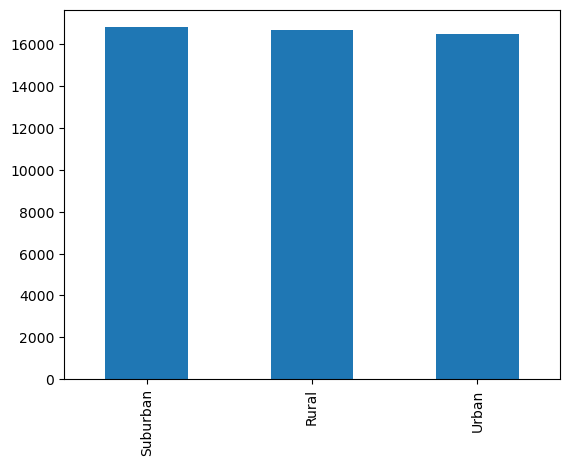

In [34]:
train_sampled.Location.value_counts().plot(kind='bar')


In [35]:
import plotly.express as px
import plotly.io as pio

# Ensure Plotly uses iframe renderer
pio.renderers.default = 'iframe'

# Plot categorical histogram for 'Policy Type'
fig = px.histogram(
    train_sampled,
    x='Policy Type',
    title='Distribution of Policy Type',
    labels={'Policy Type': 'Policy Type'}
)
fig.update_layout(yaxis_title='Frequency')
fig.show()


In [36]:
import plotly.express as px
import plotly.io as pio

# Set rendering to iframe for Jupyter
pio.renderers.default = 'iframe'

# Scatter plot: Age vs Premium Amount colored by Policy Type
fig = px.scatter(
    train_sampled,
    x='Age',
    y='Premium Amount',
    color='Policy Type',
    title='Age vs Premium Amount with Policy Type',
    labels={'Age': 'Age', 'Premium Amount': 'Premium Amount'}
)
fig.show()


In [37]:
train_sampled['Gender'].value_counts()

Male      25058
Female    24942
Name: Gender, dtype: int64

In [38]:
import plotly.express as px
import plotly.io as pio

# Set rendering to iframe for Jupyter Notebook
pio.renderers.default = 'iframe'

# Box plot to compare Premium Amount by Gender
fig = px.box(
    train_sampled,
    x='Gender',
    y='Premium Amount',
    title='Premium Amount by Gender',
    labels={'Gender': 'Gender', 'Premium Amount': 'Premium Amount'}
)
fig.show()


In [39]:
import plotly.express as px
import plotly.io as pio

# Set rendering to iframe for Jupyter Notebook
pio.renderers.default = 'iframe'

# Box plot to compare Previous Claims by Gender
fig = px.box(
    train_sampled,
    x='Gender',
    y='Previous Claims',
    title='Previous Claims by Gender',
    labels={'Gender': 'Gender', 'Previous Claims': 'Previous Claims'}
)
fig.show()


In [40]:
gender_marital_status = pd.crosstab(train_sampled['Gender'], train_sampled['Marital Status'])


import plotly.express as px
import plotly.io as pio

# Set rendering to iframe for Jupyter
pio.renderers.default = 'iframe'

# Plot grouped bar chart for Marital Status by Gender
fig = px.bar(
    gender_marital_status,
    barmode='group',
    title='Marital Status by Gender',
    labels={'Gender': 'Gender', 'value': 'Count'},
    text_auto=True
)
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count'
)
fig.show()


In [41]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

# Set rendering to iframe for Jupyter Notebook
pio.renderers.default = 'iframe'

# Create the cross-tabulations
gender_marital_status = pd.crosstab(train_sampled['Gender'], train_sampled['Marital Status'])
gender_policy_type = pd.crosstab(train_sampled['Gender'], train_sampled['Policy Type'])

# Plot: Marital Status by Gender
fig1 = px.bar(
    gender_marital_status,
    barmode='group',
    title='Marital Status by Gender',
    labels={'Gender': 'Gender', 'value': 'Count'},
    text_auto=True
)
fig1.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count'
)


# Display the plots
fig1.show()


In [42]:
# Plot: Policy Type by Gender
fig2 = px.bar(
    gender_policy_type,
    barmode='group',
    title='Policy Type by Gender',
    labels={'Gender': 'Gender', 'value': 'Count'},
    text_auto=True
)
fig2.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count'
)
fig2.show()


In [43]:
gender_smoking_status = pd.crosstab(train_sampled['Gender'], train_sampled['Smoking Status'])

import plotly.express as px
import plotly.io as pio
import pandas as pd

# Set rendering to iframe for Jupyter Notebook
pio.renderers.default = 'iframe'

# Create the cross-tabulation
gender_smoking_status = pd.crosstab(train_sampled['Gender'], train_sampled['Smoking Status'])

# Plot: Smoking Status by Gender
fig = px.bar(
    gender_smoking_status,
    barmode='group',
    title='Smoking Status by Gender',
    labels={'Gender': 'Gender', 'value': 'Count'},
    text_auto=True
)
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count'
)

# Display the plot
fig.show()


In [46]:
dependents_policy_type = pd.crosstab(train_sampled['Number of Dependents'], train_sampled['Policy Type'])
dependents_policy_type = dependents_policy_type.reset_index()
dependents_policy_type = dependents_policy_type.melt(id_vars='Number of Dependents', var_name='Policy Type', value_name='Count')
import plotly.express as px
fig = px.pie(dependents_policy_type, names='Policy Type', values='Count', 
             title='Number of Dependents by Policy Type', 
             color='Policy Type', 
             labels={'Policy Type': 'Policy Type', 'Count': 'Count'})
fig.show()



In [47]:
# رسم العلاقة بين عدد المعالين وقيمة القسط
import plotly.express as px
fig = px.scatter(train_sampled, x='Number of Dependents', y='Premium Amount', color='Policy Type',
                 title='Number of Dependents vs Premium Amount by Policy Type', 
                 labels={'Number of Dependents': 'Number of Dependents', 'Premium Amount': 'Premium Amount'})
fig.show()


In [48]:
# رسم تأثير عدد المعالين على قيمة القسط باستخدام Box Plot
import plotly.express as px
fig = px.box(train_sampled, x='Number of Dependents', y='Premium Amount', color='Policy Type',
             title='Premium Amount by Number of Dependents and Policy Type',
             labels={'Number of Dependents': 'Number of Dependents', 'Premium Amount': 'Premium Amount'})
fig.show()


In [49]:
train_sampled['Annual Income'].min(),train_sampled['Annual Income'].max()

(16.0, 149996.0)

In [50]:
fig = px.histogram(train_sampled,
                   x="Annual Income",
                   color='Gender',
                   range_x=[0,150000],
                   animation_frame='Marital Status',
                  category_orders={'Marital Status':['Single', 'Married', 'Divorced']},
                   title="Annual Income Distribution",

                   )
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

fig.show()

# 1. Location vs. Premium Amount
# Insight: You could analyze how location influences Premium Amount. Certain regions may have higher or lower premiums due to regional factors like healthcare costs, accident rates, or the cost of living. For instance, urban areas might have higher premiums due to a greater likelihood of claims.

In [51]:

# Create box plot for Premium Amount by Location
fig = px.box(train_sampled, x="Location", y="Premium Amount", 
             title="Premium Amount by Location", 
             labels={"Location": "Location", "Premium Amount": "Premium Amount"})
fig.show()


In [52]:
# Create box plot for Income by Location
fig = px.box(train_sampled, x="Location", y="Annual Income", 
             title="Income Distribution by Location", 
             labels={"Location": "Location", "Annual Income": "Income"})
fig.show()


# Location vs. Previous Claims
# Insight: Some regions might experience more claims due to environmental factors (e.g., floods, accidents, or health issues), which can influence premiums and insurance policies. Comparing Previous Claims by Location can help you identify such trends.

In [53]:
# Create box plot for Previous Claims by Location
fig = px.box(train_sampled, x="Location", y="Previous Claims", 
             title="Previous Claims by Location", 
             labels={"Location": "Location", "Previous Claims": "Previous Claims"})
fig.show()


In [54]:
# Create box plot for Number of Dependents by Location
fig = px.box(train_sampled, x="Location", y="Number of Dependents", 
             title="Number of Dependents by Location", 
             labels={"Location": "Location", "Number of Dependents": "Number of Dependents"})
fig.show()


In [55]:
# Group by Location and calculate the mean of Number of Dependents
location_dependents_mean = train_sampled.groupby('Location')['Number of Dependents'].mean().reset_index()

# Create a bar plot for Number of Dependents by Location
fig = px.bar(location_dependents_mean, x='Location', y='Number of Dependents', 
             title="Average Number of Dependents by Location", 
             labels={"Location": "Location", "Number of Dependents": "Average Number of Dependents"})
fig.show()


In [56]:
import plotly.express as px

# Create a violin plot for Number of Dependents by Location
fig = px.violin(train_sampled, x="Location", y="Number of Dependents", box=True, 
               title="Number of Dependents by Location (Violin Plot)", 
               labels={"Location": "Location", "Number of Dependents": "Number of Dependents"})
fig.show()


In [57]:
# Create a bar chart for Occupation by Location
fig = px.bar(train_sampled, x="Location", color="Occupation", 
             title="Occupation Distribution by Location", 
             labels={"Location": "Location", "Occupation": "Occupation"})
fig.show()

In [58]:

occupation_location_percentage = train_sampled.groupby(['Location', 'Occupation']).size().reset_index(name='Count')
occupation_location_percentage['Percentage'] = occupation_location_percentage.groupby('Location')['Count'].transform(lambda x: x / x.sum() * 100)

fig = px.bar(occupation_location_percentage, x="Location", y="Percentage", color="Occupation", 
             title="Occupation Distribution by Location",
             labels={"Location": "Location", "Percentage": "Percentage", "Occupation": "Occupation"},
             barmode='stack')
fig.show()


In [59]:
import plotly.express as px

# Create a box plot for Premium Amount by Policy Type
fig = px.box(train_sampled, x="Policy Type", y="Premium Amount", 
             title="Premium Amount by Policy Type", 
             labels={"Policy Type": "Policy Type", "Premium Amount": "Premium Amount"})
fig.show()


In [60]:
# Create a histogram for Premium Amount by Policy Type
fig = px.histogram(train_sampled, x="Premium Amount", color="Policy Type", 
                   title="Distribution of Premium Amount by Policy Type", 
                   labels={"Premium Amount": "Premium Amount"})
fig.show()


Insight: This will help you explore how Age, Premium Amount, and the number of dependents interact with each other, and which Policy Types are associated with higher premiums, more dependents, and different ages.

In [61]:
train_sampled['Age'].nsmallest(1)

157267    18.0
Name: Age, dtype: float64

In [62]:
train_data['Age'].nlargest(1)

27    64.0
Name: Age, dtype: float64

In [63]:
import plotly.express as px

# Create a bubble plot for Age vs Premium Amount with bubble size as Number of Dependents
fig = px.scatter(train_sampled, x="Age", y="Premium Amount", size="Number of Dependents", color="Policy Type", 
                 title="Age vs Premium Amount with Number of Dependents", 
                 labels={"Age": "Age", "Premium Amount": "Premium Amount", "Number of Dependents": "Number of Dependents"})
fig.show()


In [64]:
import plotly.express as px

# Create a line plot for Premium Amount by Property Type over Policy Year
fig = px.line(
    train_sampled, 
    x="Policy Year", 
    y="Premium Amount", 
    color="Property Type", 
    title="Premium Amount Over Time by Property Type", 
    labels={"Policy Year": "Policy Year", "Premium Amount": "Premium Amount"}
)
fig.show()


In [65]:
import plotly.express as px

# Create a box plot for Premium Amount by Property Type
fig = px.box(
    train_sampled, 
    x="Property Type", 
    y="Premium Amount", 
    title="Premium Amount by Property Type", 
    labels={"Property Type": "Property Type", "Premium Amount": "Premium Amount"}
)
fig.show()



In [66]:
import plotly.express as px

# Create a pie chart for Property Type distribution
fig = px.pie(
    train_sampled, 
    names="Property Type", 
    title="Property Type Distribution"
)
fig.show()


In [67]:
import plotly.express as px

# رسم Box Plot لتوزيع Premium Amount حسب Credit Score
fig = px.box(
    train_sampled, 
    x="Credit Score", 
    y="Premium Amount", 
    title="Premium Amount by Credit Score", 
    labels={"Credit Score": "Credit Score", "Premium Amount": "Premium Amount"}
)
fig.show()




In [68]:
import plotly.express as px

# رسم Violin Plot لتوزيع Credit Score حسب Insurance Policy Type
fig = px.violin(
    train_sampled, 
    x="Policy Type", 
    y="Credit Score", 
    title="Credit Score by Insurance Policy Type", 
    labels={"Policy Type": "Insurance Policy Type", "Credit Score": "Credit Score"}
)
fig.show()


In [69]:
fig = px.scatter(
    train_sampled, 
    x="Credit Score", 
    y="Smoking Status", 
    title="Credit Score vs Smoking Status", 
    labels={"Credit Score": "Credit Score", "Smoking Status": "Smoking Status"}
)
fig.show()


In [70]:
train_sampled['Number of Dependents'].value_counts()

3.000000    9410
4.000000    9305
2.000000    9067
0.000000    8992
1.000000    8739
2.018581    4487
Name: Number of Dependents, dtype: int64

In [71]:
pie_chart = px.pie(
        data_frame=train_sampled,
        names='Number of Dependents',
        template='presentation',
        width=800,
        height=550,
        hole=0.5,
        title='Distribution of Number of Dependents',
        )



pie_chart.show()

In [72]:
train_sampled['Education Level'].value_counts()

Master's       12750
PhD            12631
Bachelor's     12626
High School    11993
Name: Education Level, dtype: int64

In [73]:
pie_chart = px.pie(
        data_frame=train_sampled,
        
        names='Education Level',
        template='presentation',
        width=800,
        height=550,
        hole=0.5,
        title='Distribution of Number of Dependents',
        category_orders={'Education Level':["High School","Bachelor's","Master's",'PhD']}
        )
pie_chart.show()

In [74]:
# Calculate average income and premium amount by education level
edu_income_premium = train_sampled.groupby('Education Level')[['Annual Income', 'Premium Amount']].mean().reset_index()

# Plot bar chart
fig = px.bar(
    edu_income_premium, 
    x='Education Level', 
    y=['Annual Income', 'Premium Amount'], 
    barmode='group',
    title='Average Annual Income and Premium Amount by Education Level',
    labels={'value': 'Amount', 'variable': 'Metric'},
    text_auto=True
)
fig.show()


In [75]:
# Box plot for annual income by education level
fig_income = px.box(
    train_sampled, 
    x='Education Level', 
    y='Annual Income', 
    title='Distribution of Annual Income by Education Level', 
    labels={'Annual Income': 'Annual Income', 'Education Level': 'Education Level'}
)
fig_income.show()

# Box plot for premium amount by education level
fig_premium = px.box(
    train_sampled, 
    x='Education Level', 
    y='Premium Amount', 
    title='Distribution of Premium Amount by Education Level', 
    labels={'Premium Amount': 'Premium Amount', 'Education Level': 'Education Level'}
)
fig_premium.show()


In [77]:
# Box plot for credit score by education level
fig_credit = px.box(
    train_sampled, 
    x='Education Level', 
    y='Credit Score', 
    title='Credit Score Distribution by Education Level', 
    labels={'Credit Score': 'Credit Score', 'Education Level': 'Education Level'}
)
fig_credit.show()


In [78]:
# Box plot for credit score by education level and policy type
fig_credit_policy = px.box(
    train_sampled, 
    x='Education Level', 
    y='Credit Score', 
    color='Policy Type',
    title='Credit Score by Education Level and Policy Type',
    labels={'Credit Score': 'Credit Score', 'Education Level': 'Education Level'},
    category_orders={'Policy Type': train_sampled['Policy Type'].unique()}
)
fig_credit_policy.show()


In [79]:
import plotly.express as px

# Create a scatter matrix with increased size
fig = px.scatter_matrix(
    train_sampled,
    dimensions=['Insurance Duration', 'Annual Income', 'Health Score', 'Previous Claims', 'Vehicle Age', "Credit Score"],
    title="Scatter Matrix for Selected Features",
    labels={
        'Insurance Duration': 'Insurance Duration',
        'Annual Income': 'Annual Income',
        'Health Score': 'Health Score',
        'Previous Claims': 'Previous Claims',
        'Vehicle Age': 'Vehicle Age',
        'Credit Score': 'Credit Score',
    }
)

# Set larger dimensions for the figure
fig.update_layout(
    width=1200,
    height=1200,
    title_font_size=18
)

# Show the plot
fig.show()


In [81]:
# Identify numerical and categorical columns
numerical_columns1 = train_sampled.select_dtypes(include=['number']).columns
categorical_columns1 = train_sampled.select_dtypes(include=['object']).columns
tar_col ='Premium Amount';


In [82]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

for i in categorical_columns1:
    #  Subplot
    fig = make_subplots(
        rows=1, cols=2, 
        subplot_titles=(f'Distribution of {i}', f"Box Plot for {i}")
    )

    # Count Plot
    count_data = train_sampled[i].value_counts()
    fig.add_trace(
        go.Bar(x=count_data.index, y=count_data.values, name="Count", marker=dict(color='blue')),
        row=1, col=1
    )

    # Box Plot
    fig.add_trace(
        go.Box(x=train_sampled[i], y=train_sampled[tar_col], name="Box", marker=dict(color='red')),
        row=1, col=2
    )

   


In [71]:
# التحقق من الأعمدة الموجودة في البيانات
print(train_sampled.columns)

# التحقق من الأعمدة المحددة
print(categorical_columns1)
print(numerical_columns1)


Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'Policy Year', 'Policy Month',
       'Policy Day', 'Days Since Policy Start', 'Years Since Policy Start'],
      dtype='object')
Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')
Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Policy Year', 'Policy Month', 'Policy Day',
       'Days Since Policy Start', 'Years Since Policy Sta

In [72]:
# Identify numerical and categorical columns
numerical_columns1 = train_sampled.select_dtypes(include=['number']).columns
categorical_columns1 = train_sampled.select_dtypes(include=['object']).columns
numerical_columns1 = [col for col in numerical_columns1 if col != 'Premium Amount']

In [74]:
# تقسيم البيانات إلى تدريب واختبار بعد التأكد من الأعمدة
X = train_sampled[categorical_columns1 + numerical_columns1]
y = train_sampled['Premium Amount']

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# بناء الـ pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns1),  # توحيد المتغيرات العددية
        ('cat', OneHotEncoder(drop='first'), categorical_columns1)  # One-Hot Encoding للمتغيرات الفئوية
    ])

# تطبيق الـ pipeline
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# عرض شكل البيانات بعد التوحيد والتحويل
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(40000, 34)
(10000, 34)


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Model 1: Linear Regression
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),   
    ('regressor', LinearRegression())
])

# Model 2: Random Forest Regressor with hyperparameter tuning
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', RandomForestRegressor())
])

# Model 3: Gradient Boosting Regressor with hyperparameter tuning
gb = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', GradientBoostingRegressor())
])

# Hyperparameter tuning for RandomForest and GradientBoosting
param_grid_rf = {'regressor__n_estimators': [100, 200], 'regressor__max_depth': [10, 20]}
param_grid_gb = {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.05, 0.1]}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1)
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1)

# Train and evaluate models
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Number '
                                                                          'of '
                                                                          'Dependents',
                                                                          'Health '
                                                                          'Score',
                                                                          'Previous '
                                                                          'Claims',
                                                                          'Vehicle '
                                                                          'Age',
                                                                          'Credit '
                                                                          'Score',
                                                                          'Insurance '
                                                                          'Duration',
                                                                          'Premium '
                                                                          'Amount',
                                                                          'Policy '
                                                                          'Year',
                                                                          'Policy '
                                                                          'Month',
                                                                          'Policy '
                                                                          'Day',
                                                                          'Days '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start',
                                                                          'Year...
                                                                          'Policy '
                                                                          'Start']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education '
                                                                          'Level',
                                                                          'Occupation',
                                                                          'Location',
                                                                          'Policy '
                                                                          'Type',
                                                                          'Customer '
                                                                          'Feedback',
                                          

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Number '
                                                                          'of '
                                                                          'Dependents',
                                                                          'Health '
                                                                          'Score',
                                                                          'Previous '
                                                                          'Claims',
                                                                          'Vehicle '
                                                                          'Age',
                                                                          'Credit '
                                                                          'Score',
                                                                          'Insurance '
                                                                          'Duration',
                                                                          'Premium '
                                                                          'Amount',
                                                                          'Policy '
                                                                          'Year',
                                                                          'Policy '
                                                                          'Month',
                                                                          'Policy '
                                                                          'Day',
                                                                          'Days '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start',
                                                                          'Year...
                                                                          'Start']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education '
                                                                          'Level',
                                                                          'Occupation',
                                                                          'Location',
                                                                          'Policy '
                                                                          'Type',
                                                                          'Customer '
                                                                          'Feedback',
                                                                          'Smoking '
                                         

In [78]:
# Train and evaluate models
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Number '
                                                                          'of '
                                                                          'Dependents',
                                                                          'Health '
                                                                          'Score',
                                                                          'Previous '
                                                                          'Claims',
                                                                          'Vehicle '
                                                                          'Age',
                                                                          'Credit '
                                                                          'Score',
                                                                          'Insurance '
                                                                          'Duration',
                                                                          'Premium '
                                                                          'Amount',
                                                                          'Policy '
                                                                          'Year',
                                                                          'Policy '
                                                                          'Month',
                                                                          'Policy '
                                                                          'Day',
                                                                          'Days '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start',
                                                                          'Year...
                                                                          'Policy '
                                                                          'Start']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education '
                                                                          'Level',
                                                                          'Occupation',
                                                                          'Location',
                                                                          'Policy '
                                                                          'Type',
                                                                          'Customer '
                                                                          'Feedback',
                                          

In [79]:
grid_search_gb.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Number '
                                                                          'of '
                                                                          'Dependents',
                                                                          'Health '
                                                                          'Score',
                                                                          'Previous '
                                                                          'Claims',
                                                                          'Vehicle '
                                                                          'Age',
                                                                          'Credit '
                                                                          'Score',
                                                                          'Insurance '
                                                                          'Duration',
                                                                          'Premium '
                                                                          'Amount',
                                                                          'Policy '
                                                                          'Year',
                                                                          'Policy '
                                                                          'Month',
                                                                          'Policy '
                                                                          'Day',
                                                                          'Days '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start',
                                                                          'Year...
                                                                          'Start']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education '
                                                                          'Level',
                                                                          'Occupation',
                                                                          'Location',
                                                                          'Policy '
                                                                          'Type',
                                                                          'Customer '
                                                                          'Feedback',
                                                                          'Smoking '
                                         

In [80]:
# Linear Regression doesn't require hyperparameter tuning
lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration',
                                                   'Premium Amount',
                                                   'Policy Year',
                                                   'Policy Month', 'Policy Day',
                                                   'Days Since Policy Start',
                                                   'Years Since Policy Start']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Marital Status',
                                                   'Education Level',
                                                   'Occupation', 'Location',
                                                   'Policy Type',
                                                   'Customer Feedback',
                                                   'Smoking Status',
                                                   'Exercise Frequency',
                                                   'Property Type'])])),
                ('regressor', LinearRegression())])

In [81]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# Model evaluation for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
medae_lr = median_absolute_error(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
medae_rf = median_absolute_error(y_test, y_pred_rf)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
medae_gb = median_absolute_error(y_test, y_pred_gb)

# Print the evaluation results
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}, MedAE: {medae_lr}")
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}, MedAE: {medae_rf}")
print(f"Gradient Boosting - MAE: {mae_gb}, MSE: {mse_gb}, R²: {r2_gb}, MedAE: {medae_gb}")


Linear Regression - MAE: 1.1264546628808603e-12, MSE: 2.17028669785245e-24, R²: 1.0, MedAE: 9.094947017729282e-13
Random Forest - MAE: 0.06525200000000303, MSE: 0.2441818399999983, R²: 0.9999996622586753, MedAE: 0.0
Gradient Boosting - MAE: 2.5378044850850414, MSE: 13.374407219157973, R²: 0.9999815011222304, MedAE: 1.7297485504266206


In [83]:
from sklearn.model_selection import cross_val_score
import numpy as np

# تقييم النماذج باستخدام Cross-Validation

# 1. Linear Regression
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lr_cv_mae = -np.mean(lr_cv_scores)  # تحويل من القيم السالبة
print(f"Linear Regression - Mean MAE (Cross-Validation): {lr_cv_mae:.4f}")

# 2. Random Forest
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_mae = -np.mean(rf_cv_scores)
print(f"Random Forest - Mean MAE (Cross-Validation): {rf_cv_mae:.4f}")

# 3. Gradient Boosting
gb_cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gb_cv_mae = -np.mean(gb_cv_scores)
print(f"Gradient Boosting - Mean MAE (Cross-Validation): {gb_cv_mae:.4f}")


Linear Regression - Mean MAE (Cross-Validation): 0.0000
Random Forest - Mean MAE (Cross-Validation): 0.3204
Gradient Boosting - Mean MAE (Cross-Validation): 51.5893


In [84]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regularization
ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Lasso Regularization
lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Hyperparameter tuning for Ridge and Lasso
param_grid_ridge = {'regressor__alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {'regressor__alpha': [0.01, 0.1, 1, 10, 100]}

grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, n_jobs=-1)
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, n_jobs=-1)

# Fit the models
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

# Get best models
best_ridge = grid_search_ridge.best_estimator_
best_lasso = grid_search_lasso.best_estimator_

# Display results
print(f"Best Ridge Model: {best_ridge}")
print(f"Best Lasso Model: {best_lasso}")


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Number '
                                                                          'of '
                                                                          'Dependents',
                                                                          'Health '
                                                                          'Score',
                                                                          'Previous '
                                                                          'Claims',
                                                                          'Vehicle '
                                                                          'Age',
                                                                          'Credit '
                                                                          'Score',
                                                                          'Insurance '
                                                                          'Duration',
                                                                          'Premium '
                                                                          'Amount',
                                                                          'Policy '
                                                                          'Year',
                                                                          'Policy '
                                                                          'Month',
                                                                          'Policy '
                                                                          'Day',
                                                                          'Days '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start',
                                                                          'Years '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education '
                                                                          'Level',
                                                                          'Occupation',
                                                                          'Location',
                                                                          'Policy '
                                                                          'Type',
                                                                          'Customer '
                                             

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Number '
                                                                          'of '
                                                                          'Dependents',
                                                                          'Health '
                                                                          'Score',
                                                                          'Previous '
                                                                          'Claims',
                                                                          'Vehicle '
                                                                          'Age',
                                                                          'Credit '
                                                                          'Score',
                                                                          'Insurance '
                                                                          'Duration',
                                                                          'Premium '
                                                                          'Amount',
                                                                          'Policy '
                                                                          'Year',
                                                                          'Policy '
                                                                          'Month',
                                                                          'Policy '
                                                                          'Day',
                                                                          'Days '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start',
                                                                          'Years '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education '
                                                                          'Level',
                                                                          'Occupation',
                                                                          'Location',
                                                                          'Policy '
                                                                          'Type',
                                                                          'Customer '
                                             

Best Ridge Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration',
                                                   'Premium Amount',
                                                   'Policy Year',
                                                   'Policy Month', 'Policy Day',
                                                   'Days Since Policy Start',
                                                   'Years Since Policy Start']),
      

In [85]:
param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best Random Forest Model: {best_rf}")


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Number '
                                                                          'of '
                                                                          'Dependents',
                                                                          'Health '
                                                                          'Score',
                                                                          'Previous '
                                                                          'Claims',
                                                                          'Vehicle '
                                                                          'Age',
                                                                          'Credit '
                                                                          'Score',
                                                                          'Insurance '
                                                                          'Duration',
                                                                          'Premium '
                                                                          'Amount',
                                                                          'Policy '
                                                                          'Year',
                                                                          'Policy '
                                                                          'Month',
                                                                          'Policy '
                                                                          'Day',
                                                                          'Days '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start',
                                                                          'Year...
                                                                          'Education '
                                                                          'Level',
                                                                          'Occupation',
                                                                          'Location',
                                                                          'Policy '
                                                                          'Type',
                                                                          'Customer '
                                                                          'Feedback',
                                                                          'Smoking '
                                                                          'Status',
                                                                          'Exercise '
                                                                          'Frequency',
                                                                          'Property '
                                                                          'Type'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'

Best Random Forest Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration',
                                                   'Premium Amount',
                                                   'Policy Year',
                                                   'Policy Month', 'Policy Day',
                                                   'Days Since Policy Start',
                                                   'Years Since Policy Start'])

In [88]:

# Reduced parameter grid for faster GridSearchCV
param_grid_gb = {
    'regressor__n_estimators': [100, 200],  # Fewer estimators
    'regressor__learning_rate': [0.01, 0.05],  # Fewer learning rates
    'regressor__max_depth': [3, 5]  # Fewer max_depths
}

# Initialize GridSearchCV with the reduced parameter grid
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1)

# Fit the model with the smaller grid
grid_search_gb.fit(X_train, y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print(f"Best Gradient Boosting Model: {best_gb}")



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Number '
                                                                          'of '
                                                                          'Dependents',
                                                                          'Health '
                                                                          'Score',
                                                                          'Previous '
                                                                          'Claims',
                                                                          'Vehicle '
                                                                          'Age',
                                                                          'Credit '
                                                                          'Score',
                                                                          'Insurance '
                                                                          'Duration',
                                                                          'Premium '
                                                                          'Amount',
                                                                          'Policy '
                                                                          'Year',
                                                                          'Policy '
                                                                          'Month',
                                                                          'Policy '
                                                                          'Day',
                                                                          'Days '
                                                                          'Since '
                                                                          'Policy '
                                                                          'Start',
                                                                          'Year...
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Education '
                                                                          'Level',
                                                                          'Occupation',
                                                                          'Location',
                                                                          'Policy '
                                                                          'Type',
                                                                          'Customer '
                                                                          'Feedback',
                                                                          'Smoking '
                                                                          'Status',
                                                                          'Exercise '
                                    

Best Gradient Boosting Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration',
                                                   'Premium Amount',
                                                   'Policy Year',
                                                   'Policy Month', 'Policy Day',
                                                   'Days Since Policy Start',
                                                   'Years Since Policy Star

# Step 5: Evaluation Metrics
For regression, the following metrics are used:

Mean Absolute Error (MAE)
Mean Squared Error (MSE)
R² Score (R-squared)
Median Absolute Error (MedAE)

In [87]:
# Evaluate models after optimization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = [best_ridge, best_lasso, best_rf, best_gb]
model_names = ["Ridge", "Lasso", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")
    print("-" * 30)


import plotly.graph_objects as go

# Store results from the evaluation
mae_values = [mean_absolute_error(y_test, model.predict(X_test)) for model in models]
mse_values = [mean_squared_error(y_test, model.predict(X_test)) for model in models]
r2_values = [r2_score(y_test, model.predict(X_test)) for model in models]

# Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=model_names,
    y=mae_values,
    name='MAE',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=model_names,
    y=mse_values,
    name='MSE',
    marker_color='red'
))

fig.add_trace(go.Bar(
    x=model_names,
    y=r2_values,
    name='R²',
    marker_color='green'
))

# Update layout for better visualization
fig.update_layout(
    title="Evaluation Metrics for Optimized Models",
    xaxis_title="Models",
    yaxis_title="Scores",
    barmode='group',
    legend=dict(title="Metrics"),
    template="plotly_white"
)

# Show the interactive plot
fig.show()



Model: Ridge
MAE: 0.00016590795603597144
MSE: 4.549286534361618e-08
R²: 0.999999999999937
------------------------------
Model: Lasso
MAE: 0.007668671153376544
MSE: 9.70985877244956e-05
R²: 0.9999999998656977
------------------------------
Model: Random Forest
MAE: 0.06357150000000715
MSE: 0.20936241250000204
R²: 0.9999997104193393
------------------------------
Model: Gradient Boosting
MAE: 0.05808380040383474
MSE: 0.09181056739744338
R²: 0.9999998730117577
------------------------------


# Step 6: Check if Scaling Affects Accuracy
there will make error if you run the cell

In [126]:
# Without Scaling (raw data)
X_train_no_scale = X_train
X_test_no_scale = X_test

# Train and evaluate without scaling
lr_no_scale = LinearRegression().fit(X_train_no_scale, y_train)
y_pred_lr_no_scale = lr_no_scale.predict(X_test_no_scale)

mae_lr_no_scale = mean_absolute_error(y_test, y_pred_lr_no_scale)
mse_lr_no_scale = mean_squared_error(y_test, y_pred_lr_no_scale)

print(f"Linear Regression without scaling - MAE: {mae_lr_no_scale}, MSE: {mse_lr_no_scale}")


Linear Regression without scaling - MAE: 661.5172790250398, MSE: 727145.790001738


# Step 7: Check if Normalization Affects Accuracy

In [90]:
from sklearn.preprocessing import MinMaxScaler

normalizer = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns1),  # Min-Max Scaling for numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_columns1)  # One-Hot Encoding for categorical features
    ])

# Apply normalizer and train models
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

lr_normalized = LinearRegression().fit(X_train_normalized, y_train)
y_pred_lr_normalized = lr_normalized.predict(X_test_normalized)

# Evaluation
mae_lr_normalized = mean_absolute_error(y_test, y_pred_lr_normalized)
mse_lr_normalized = mean_squared_error(y_test, y_pred_lr_normalized)

print(f"Linear Regression with normalization - MAE: {mae_lr_normalized}, MSE: {mse_lr_normalized}")


Linear Regression with normalization - MAE: 8.931857919947107e-12, MSE: 8.430251889657899e-23


# Step 9: Visualize Results

In [91]:
import plotly.graph_objects as go

# Data for visualization
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mae_values = [mae_lr, mae_rf, mae_gb]
mse_values = [mse_lr, mse_rf, mse_gb]
r2_values = [r2_lr, r2_rf, r2_gb]

# Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=models,
    y=mae_values,
    name='MAE',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=models,
    y=mse_values,
    name='MSE',
    marker_color='red'
))

fig.add_trace(go.Bar(
    x=models,
    y=r2_values,
    name='R²',
    marker_color='green'
))

# Update layout for better visualization
fig.update_layout(
    title="Model Evaluation Metrics",
    xaxis_title="Models",
    yaxis_title="Scores",
    barmode='group',
    legend=dict(title="Metrics"),
    template="plotly_white"
)




In [92]:
train_sampled.info

<bound method DataFrame.info of          Age  Gender  Annual Income Marital Status  Number of Dependents  \
135241  56.0    Male         9063.0       Divorced              2.000000   
118592  42.0  Female         1310.0         Single              3.000000   
109517  38.0    Male       113715.0        Married              0.000000   
60306   59.0  Female        88904.0       Divorced              0.000000   
39513   60.0  Female        82813.0        Married              0.000000   
...      ...     ...            ...            ...                   ...   
186802  62.0  Female        12984.0        Married              4.000000   
41985   25.0    Male        12097.0        Married              3.000000   
53335   28.0    Male        18791.0         Single              4.000000   
167631  58.0    Male         3050.0         Single              2.018581   
99451   55.0  Female         4900.0        Married              4.000000   

       Education Level     Occupation  Health Score  Lo

# Feature Engineering

Step 1: Create New Features:
Income_Per_Dependent: Annual Income divided by Number of Dependents.
Claims_Ratio: Ratio of Previous Claims to Insurance Duration.
Age_Premium_Ratio: Vehicle Age divided by Premium Amount.
python
Copy code


In [93]:
# Create a copy of the dataset
train_sampled_copy = train_sampled.copy()

# Create interaction terms
train_sampled_copy['Income_Per_Dependent'] = train_sampled_copy['Annual Income'] / (train_sampled_copy['Number of Dependents'] + 1)  # Avoid division by zero
train_sampled_copy['Claims_Ratio'] = train_sampled_copy['Previous Claims'] / (train_sampled_copy['Insurance Duration'] + 1)


# Check new features
train_sampled_copy[['Income_Per_Dependent', 'Claims_Ratio']].head()


,Income_Per_Dependent,Claims_Ratio
135241,3021.0,0.142857
118592,327.5,0.250000
109517,113715.0,0.142857
60306,88904.0,0.200000
39513,82813.0,0.000000


In [94]:
from sklearn.feature_selection import mutual_info_regression

# Using mutual information for categorical variables
cat_features = train_sampled_copy.select_dtypes(include=['object']).columns
cat_features_dummies = pd.get_dummies(train_sampled_copy[cat_features])

# حساب mutual information
mutual_info = mutual_info_regression(cat_features_dummies, train_sampled_copy['Premium Amount'])

# إنشاء Series مع أسماء الأعمدة من get_dummies
mutual_info_series = pd.Series(mutual_info, index=cat_features_dummies.columns).sort_values(ascending=False)

# عرض النتائج
print("\nHighly informative categorical features:")
print(mutual_info_series)



Highly informative categorical features:
Exercise Frequency_Daily       0.008455
Location_Rural                 0.006627
Customer Feedback_Average      0.006574
Education Level_Master's       0.006101
Exercise Frequency_Rarely      0.005240
Marital Status_Married         0.004872
Customer Feedback_Poor         0.003963
Smoking Status_Yes             0.003644
Property Type_House            0.003409
Marital Status_Divorced        0.003334
Gender_Male                    0.002677
Occupation_Self-Employed       0.002326
Policy Type_Comprehensive      0.002039
Education Level_PhD            0.001993
Location_Urban                 0.001934
Property Type_Apartment        0.001734
Marital Status_Single          0.001506
Smoking Status_No              0.001391
Education Level_High School    0.001154
Exercise Frequency_Monthly     0.000120
Property Type_Condo            0.000000
Exercise Frequency_Weekly      0.000000
Gender_Female                  0.000000
Customer Feedback_Good         0.00000

# Step 8: Check if Dimensionality Reduction Affects Accuracy
To test if reducing the number of features affects accuracy, use PCA

In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_sampled_copy.select_dtypes(include=[np.number]))

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Add PCA components to the dataset
train_sampled_copy['PCA1'] = pca_result[:, 0]
train_sampled_copy['PCA2'] = pca_result[:, 1]

# Visualize PCA results
import plotly.express as px
px.scatter(
    train_sampled_copy, x='PCA1', y='PCA2', 
    color='Policy Type', 
    title="PCA Visualization of Policy Type"
)


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data
X_pca = train_sampled_copy[['PCA1', 'PCA2']]
y = train_sampled_copy['Premium Amount']
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluate performance
mse_pca = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with PCA: {mse_pca}")


LinearRegression()

Mean Squared Error with PCA: 727145.790001738


In [97]:
pca = PCA(n_components=15)  # أو n_components=10
pca_result = pca.fit_transform(scaled_features)


In [98]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")


Explained Variance Ratio: [1.87804228e-01 1.21166286e-01 1.15439047e-01 6.76849528e-02
 6.40668930e-02 6.34235617e-02 6.29341126e-02 6.25337412e-02
 6.21821878e-02 6.14659788e-02 6.11503748e-02 5.34105754e-02
 8.87538045e-03 7.86262392e-03 5.61378751e-08]


In [99]:
cumulative_explained_variance = np.cumsum(explained_variance)
print(f"Cumulative Explained Variance: {cumulative_explained_variance}")


Cumulative Explained Variance: [0.18780423 0.30897051 0.42440956 0.49209451 0.55616141 0.61958497
 0.68251908 0.74505282 0.80723501 0.86870099 0.92985136 0.98326194
 0.99213732 0.99999994 1.        ]


In [100]:
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f"Number of components that explain 90% of the variance: {n_components}")


Number of components that explain 90% of the variance: 11


In [101]:
# اختيار أول 11 مكونًا
pca_11 = PCA(n_components=11)
X_pca_11 = pca_11.fit_transform(train_sampled_copy.select_dtypes(include=[np.number]))


In [102]:
# تقسيم البيانات
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_11, y, test_size=0.3, random_state=42)

# تدريب نموذج الانحدار
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

# التنبؤ وتقييم الأداء
y_pred_pca = reg.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print(f"Mean Squared Error with 11 PCA components: {mse_pca}")


LinearRegression()

Mean Squared Error with 11 PCA components: 5.883724462402717e-09


In [103]:
mae_pca = mean_absolute_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"MAE with 11 PCA components: {mae_pca}")
print(f"R² with 11 PCA components: {r2_pca}")


MAE with 11 PCA components: 5.3977867301879696e-05
R² with 11 PCA components: 0.9999999999999919


# end of project

In [104]:
test_data=pd.read_csv('test_filtered.csv')

In [105]:
test_data.head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Start Date,Policy Type,Customer Feedback,Age,Annual Income,Number of Dependents,Credit Score,Premium Amount
0,Female,Single,Master's,Self-Employed,Rural,2020-01-18 15:21:39.252145,Basic,Good,57.0,52810.0,1.0,383.0,283.0
1,Female,Married,Master's,Employed,Suburban,2022-11-28 15:21:39.134960,Basic,Poor,57.0,29474.0,3.0,454.0,2796.0
2,Female,Divorced,High School,NaN,Suburban,2022-07-30 15:21:39.134960,Comprehensive,Poor,29.0,10025.0,1.0,412.0,577.0
3,Male,Married,PhD,Unemployed,Urban,2024-01-26 15:21:39.170099,Premium,Good,40.0,16078.0,4.0,615.0,1314.0
4,Male,Married,High School,Unemployed,Urban,2020-01-25 15:21:39.237118,Basic,Good,39.0,32913.0,0.0,821.0,210.0


In [106]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                100000 non-null  object 
 1   Marital Status        98512 non-null   object 
 2   Education Level       100000 non-null  object 
 3   Occupation            70167 non-null   object 
 4   Location              100000 non-null  object 
 5   Policy Start Date     100000 non-null  object 
 6   Policy Type           100000 non-null  object 
 7   Customer Feedback     93514 non-null   object 
 8   Age                   98400 non-null   float64
 9   Annual Income         96313 non-null   float64
 10  Number of Dependents  90771 non-null   float64
 11  Credit Score          88438 non-null   float64
 12  Premium Amount        100000 non-null  float64
dtypes: float64(5), object(8)
memory usage: 9.9+ MB


In [107]:
missing_values_test = test_data.isnull().sum()
data_types = test_data.dtypes

# Combine the missing values and data types into a single DataFrame
missing_data_test = pd.DataFrame({'Missing Values': missing_values_test, 'Data Type': data_types})

# Display the result
print(missing_data_test)

                      Missing Values Data Type
Gender                             0    object
Marital Status                  1488    object
Education Level                    0    object
Occupation                     29833    object
Location                           0    object
Policy Start Date                  0    object
Policy Type                        0    object
Customer Feedback               6486    object
Age                             1600   float64
Annual Income                   3687   float64
Number of Dependents            9229   float64
Credit Score                   11562   float64
Premium Amount                     0   float64


In [108]:
# Identify numerical and categorical columns
numerical_columns3 = test_data.select_dtypes(include=['number']).columns
categorical_columns3 = test_data.select_dtypes(include=['object']).columns

# Print the count of columns for each type
print(f'Number of numerical columns: {len(numerical_columns3)}')
print(f'Number of categorical columns: {len(categorical_columns3)}')

# Print the names of the columns
print(f'\nNumerical columns: {numerical_columns3}')
print(f'\nCategorical columns: {categorical_columns3}')

Number of numerical columns: 5
Number of categorical columns: 8

Numerical columns: Index(['Age', 'Annual Income', 'Number of Dependents', 'Credit Score',
       'Premium Amount'],
      dtype='object')

Categorical columns: Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Start Date', 'Policy Type', 'Customer Feedback'],
      dtype='object')


In [109]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Impute numerical columns with the mean
numerical_imputer = SimpleImputer(strategy='mean')
test_data[numerical_columns3] = numerical_imputer.fit_transform(test_data[numerical_columns3])

# Impute categorical columns with the mode (most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
test_data[categorical_columns3] = categorical_imputer.fit_transform(test_data[categorical_columns3])

# Optionally, use KNN for numerical imputation (if you prefer it over mean/median)
#knn_imputer = KNNImputer(n_neighbors=5)
#data[numerical_columns] = knn_imputer.fit_transform(data[numerical_columns])

# Check the result after filling missing values
print(test_data.isnull().sum())



Gender                  0
Marital Status          0
Education Level         0
Occupation              0
Location                0
Policy Start Date       0
Policy Type             0
Customer Feedback       0
Age                     0
Annual Income           0
Number of Dependents    0
Credit Score            0
Premium Amount          0
dtype: int64


In [110]:
#check for duplication
test_data.duplicated().sum()

0

In [112]:
test_data = test_data.drop('Premium Amount', axis=1)
test_data.head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Start Date,Policy Type,Customer Feedback,Age,Annual Income,Number of Dependents,Credit Score
0,Female,Single,Master's,Self-Employed,Rural,2020-01-18 15:21:39.252145,Basic,Good,57.0,52810.0,1.0,383.0
1,Female,Married,Master's,Employed,Suburban,2022-11-28 15:21:39.134960,Basic,Poor,57.0,29474.0,3.0,454.0
2,Female,Divorced,High School,Self-Employed,Suburban,2022-07-30 15:21:39.134960,Comprehensive,Poor,29.0,10025.0,1.0,412.0
3,Male,Married,PhD,Unemployed,Urban,2024-01-26 15:21:39.170099,Premium,Good,40.0,16078.0,4.0,615.0
4,Male,Married,High School,Unemployed,Urban,2020-01-25 15:21:39.237118,Basic,Good,39.0,32913.0,0.0,821.0


In [113]:
test_data.shape

(100000, 12)

In [114]:
# Take a sample of 10,000 rows
test_sampled = test_data.sample(n=10000)
print(test_sampled.shape)

(10000, 12)


In [115]:
test_sampled.head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Start Date,Policy Type,Customer Feedback,Age,Annual Income,Number of Dependents,Credit Score
3089,Male,Married,Bachelor's,Unemployed,Rural,2021-02-16 15:21:39.085129,Basic,Good,49.0,48913.0,4.0,431.0
79210,Male,Single,PhD,Self-Employed,Suburban,2021-10-31 15:21:39.208842,Comprehensive,Poor,49.0,104884.0,0.0,411.0
3151,Female,Married,Bachelor's,Unemployed,Rural,2022-07-20 15:21:39.080440,Comprehensive,Average,24.0,3851.0,4.0,690.0
45125,Female,Married,High School,Self-Employed,Urban,2023-11-18 15:21:39.224915,Comprehensive,Average,47.0,55724.0,0.0,769.0
6224,Female,Married,Master's,Employed,Suburban,2020-12-27 15:21:39.134960,Basic,Good,28.0,23983.0,4.0,704.0


In [116]:
# تحويل العمود إلى نوع التاريخ
test_sampled['Policy Start Date'] = pd.to_datetime(test_sampled['Policy Start Date'], errors='coerce')

# التحقق من التحويل
print(test_sampled['Policy Start Date'].dtypes)
print(test_sampled['Policy Start Date'].head())


datetime64[ns]
3089    2021-02-16 15:21:39.085129
79210   2021-10-31 15:21:39.208842
3151    2022-07-20 15:21:39.080440
45125   2023-11-18 15:21:39.224915
6224    2020-12-27 15:21:39.134960
Name: Policy Start Date, dtype: datetime64[ns]


In [117]:
#replace the missing values with virtual date
test_sampled['Policy Start Date'].fillna(pd.Timestamp('2000-01-01'), inplace=True)
test_sampled.dropna(subset=['Policy Start Date'], inplace=True)
test_sampled['Policy Year'] = test_sampled['Policy Start Date'].dt.year
test_sampled['Policy Month'] = test_sampled['Policy Start Date'].dt.month
test_sampled['Policy Day'] = test_sampled['Policy Start Date'].dt.day


In [118]:
# تصفية التواريخ المستقبلية
today = pd.Timestamp.today()
test_sampled = test_sampled[test_sampled['Policy Start Date'] <= today]
test_sampled['Policy Start Date'] = test_sampled['Policy Start Date'].dt.date
print(test_sampled['Policy Start Date'].head())
test_sampled['Policy Year'] = test_sampled['Policy Start Date'].apply(lambda x: x.year)
policy_year_distribution = test_sampled['Policy Year'].value_counts()

print(policy_year_distribution)


3089     2021-02-16
79210    2021-10-31
3151     2022-07-20
45125    2023-11-18
6224     2020-12-27
Name: Policy Start Date, dtype: object
Policy Year
2020    2045
2022    2030
2023    2030
2021    2027
2024    1197
2019     671
Name: count, dtype: int64


In [119]:
test_sampled['Policy Month'] = test_sampled['Policy Start Date'].apply(lambda x: x.month)
policy_month_distribution = test_sampled['Policy Month'].value_counts()

print(policy_month_distribution)


Policy Month
3     920
9     877
7     853
11    848
5     830
8     830
10    825
1     824
2     813
12    798
6     797
4     785
Name: count, dtype: int64


In [120]:
# تحويل العمود إلى نوع datetime
test_sampled['Policy Start Date'] = pd.to_datetime(test_sampled['Policy Start Date'])

# الحصول على تاريخ اليوم
today = pd.Timestamp.today()

# حساب عدد الأيام منذ بداية البوليصة
test_sampled['Days Since Policy Start'] = (today - test_sampled['Policy Start Date']).dt.days

# تحويل الأيام إلى سنوات
test_sampled['Years Since Policy Start'] = test_sampled['Days Since Policy Start'] / 365

# عرض البيانات للتحقق
print(test_sampled[['Policy Start Date', 'Days Since Policy Start', 'Years Since Policy Start']].head())

      Policy Start Date  Days Since Policy Start  Years Since Policy Start
3089         2021-02-16                     1544                  4.230137
79210        2021-10-31                     1287                  3.526027
3151         2022-07-20                     1025                  2.808219
45125        2023-11-18                      539                  1.476712
6224         2020-12-27                     1595                  4.369863


In [121]:
# بناء الـ pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns3),  # توحيد المتغيرات العددية
        ('cat', OneHotEncoder(drop='first'), categorical_columns3)  # One-Hot Encoding للمتغيرات الفئوية
    ])


In [122]:
print("Columns in train_sampled:", train_sampled.columns)
print("Columns in test_sampled:", test_sampled.columns)


Columns in train_sampled: Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'Policy Year', 'Policy Month',
       'Policy Day', 'Days Since Policy Start', 'Years Since Policy Start'],
      dtype='object')
Columns in test_sampled: Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Start Date', 'Policy Type', 'Customer Feedback', 'Age',
       'Annual Income', 'Number of Dependents', 'Credit Score', 'Policy Year',
       'Policy Month', 'Policy Day', 'Days Since Policy Start',
       'Years Since Policy Start'],
      dtype='object')


In [123]:
# Drop the 'Income_Per_Dependent' and 'Claims_Ratio' columns from the dataset
test_sampled = test_sampled.drop(columns=['Income_Per_Dependent', 'Claims_Ratio'])

# Verify the changes by checking the first few rows
print(test_sampled.head())


KeyError: "['Income_Per_Dependent', 'Claims_Ratio'] not found in axis"